## Statistics

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os
import subprocess
from random import gauss


In [6]:
import scipy.stats
from scipy.stats import moment

Data helpers

In [7]:
def wget_data(url):
    local_path='./tmp_data'
    subprocess.run(["wget", "-nc", "-P", local_path, url])

def locate_data(name, check_exists=True):
    local_path='./tmp_data'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuxntimeError('No such data file: {}'.format(path))
    return path

## <span style="color:Orange">Get Data</span>

In [8]:
wget_data('https://courses.physics.illinois.edu/phys398dap/fa2023/data/blobs_data.hf5')

## <span style="color:Orange">Load Data</span>

In [9]:
blobs = pd.read_hdf(locate_data('blobs_data.hf5'))
blobs.describe()

,x0,x1,x2
count,2000.000000,2000.000000,2000.000000
mean,6.920270,4.502004,8.492347
std,3.562485,2.609850,3.938487
min,0.289321,-3.686628,2.176444
25%,3.857825,3.298868,4.997269
50%,5.512911,4.981038,7.267441
75%,10.593387,6.183536,12.257059
max,14.669437,11.268355,17.189156


## <span style="color:Orange">Statistical Methods</span>

The boundary between probability and statistics is somewhat gray (similar to astronomy and astrophysics).  However, you can roughly think of statistics as the applied cousin of probability theory.

Today we're going to discuss the basics of characterizing a dataset in one or more dimensions using moments.  These include things that you are probably reasonably familiar with, like the standard deviation and the mean and others that are probably farther from your experience.

In many areas of science these are important.  

-Sometimes you just don't have a model for what a distribution should be and so you just start characterizing it using moments (often starting with the mean and standard deviation).  

-Other times you have a model, but the data isn't perfect...maybe you've got a lot of background or other noise

-in the case of multiple variables, perhaps you want to understand how two (or more) quantities are correlated


### <span style="color:LightGreen">Expectation</span>

Given a probability density $P(x,y)$, and an arbitrary function $g(x,y)$ of the same random variables, the **expectation value** of $g$ is defined as:

$$ \Large
\langle g\rangle \equiv \iint dx dy\, g(x,y) P(x,y) \; .
$$

Note that the result is just a number, and not a function of either $x$ or $y$. Also, $g$ might have dimensions, which do not need to match those of the probability density $P$, so $\langle g\rangle$ generally has dimensions.

Sometimes the assumed PDF is indicated with a subscript, $\langle g\rangle_P$, which is helpful, but more often not shown.

When $g(x,y) = x^n$, the resulting expectation value is called a **raw moment of x**. (The same definitions apply to $y$, via $g(x,y) = y^n$.) The case $n=0$ is just the normalization integral $\langle \mathbb{1}\rangle = 1$.  Low-order moments have familiar names:
 - $n=1$ yields the **mean of x**, $\overline{x} \equiv \langle x\rangle$.
 - $n=2$ yields the **root-mean square (RMS) of x**, $\langle x^2\rangle$.

 The raw moments can be defined in a similar way for any positive integer power of x.

Additionally, it is useful to define moments centered about the mean
 of the distribution.  These **central moments** of order $n$ are defined as $\langle (x - \overline{x})^n \rangle$.  The $n=1$ central moment is always 0. The
 $n=2$ central moment is the **variance of x**, which combines the mean and RMS,

$$ \Large
\sigma_x^2 \equiv \langle\left( x - \overline{x} \right)^2\rangle \; ,
$$

where $\sigma_x$ is called the **standard deviation of x**.



In [7]:
np.mean(blobs, axis=0)

x0    6.920270
x1    4.502004
x2    8.492347
dtype: float64

In [8]:
np.var(blobs, axis=0)

x0    12.684951
x1     6.807913
x2    15.503924
dtype: float64

In [9]:
np.std(blobs, axis=0)

x0    3.561594
x1    2.609198
x2    3.937502
dtype: float64

In [10]:
assert np.allclose(np.std(blobs, axis=0) ** 2, np.var(blobs, axis=0))

In [11]:
assert np.allclose(
    np.mean((blobs - np.mean(blobs, axis=0)) ** 2, axis=0),
    np.var(blobs, axis=0))

**Characterization of Measurements**

The mean and standard deviations are among the most used quantities in physics.  If you know these quantities about a single dimensional dataset, then you actually know quite a lot, regardless of the details of the distribution itself.  

The standard deviation divided by the mean is a usual way of quantifying the precision of a measurement.  For example, in high-energy physics, a calorimeter is a device for measuring
particle energy.  
-Here is a paper about a calorimeter built at Illinois showing the mean energy measured as a function of the particle energy and showing the
standard deviation of the measured energy distribution divided by the mean: https://arxiv.org/pdf/2003.13685.pdf (Fig. 8).  
-To go back to the QCD jets from a couple weeks ago, here is a paper showing the mean energy response of the ATLAS calorimeters to jets (the "JES") and the standard deviation divided by the mean (the "JER") https://arxiv.org/pdf/2205.00682.pdf (Fig. 1).

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   7.,
        108., 387., 397.,  97.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
        -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
        -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
         4.  ,  4.25,  4.5 ,  4.75,  5.  ]),
 <BarContainer object of 40 artists>)

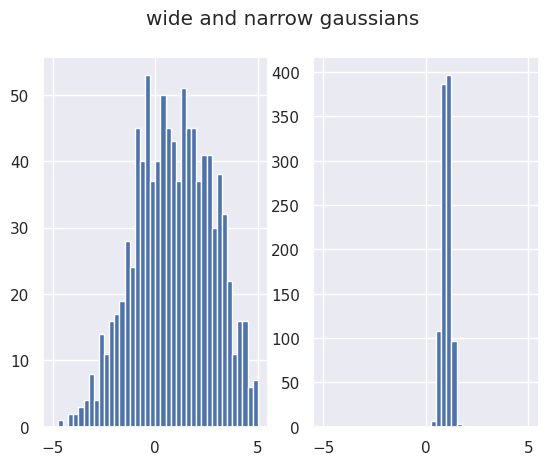

In [16]:
ntries = 1000
gaussarray_wide = np.array([])
gaussarray_narrow = np.array([])

for _ in range(ntries):
	value = gauss(1, 0.2)
	gaussarray_narrow = np.append(gaussarray_narrow,value)

for _ in range(ntries):
	value = gauss(1, 2)
	gaussarray_wide = np.append(gaussarray_wide,value)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('wide and narrow gaussians')
ax1.hist(gaussarray_wide, bins=40, range=[-5,5])
ax2.hist(gaussarray_narrow, bins=40, range=[-5,5])



Finally, standardized moments can be defined.  These are central moments normalized by the standard deviation:
$$ \Large
 \tilde{x}_N \equiv \langle\left( x - \overline{x} \right)^n\rangle / \sigma_{x} \; ,
$$

 This makes them scale-invarient and provide some information about the shape of the distribution.  The first standard moment, $\tilde{x}_1$ is 0 (just like the $n=1$ central moment).  The second standard moment is 1.  

 The skewness of a distribution can be positive, negative or zero.  A distribution that is symmetric about the mean will have zero skewness.

 The kurtosis measures the contributions from the tails of the distribution.  A Gaussian has a kurtosis of 3.

 The standard deviation, skewness and kurtosis are useful in that they enable characterization of a distribution without having a specific functional form.  In many real life cases this is very useful because there isn't a clear cut choice for the functional form, because it is useful to not have to resort to fitting to describe a distribution, or because there are various types of background in a distribution.

 Warning: there are a few different definitions of some of these observables running around.  Always check before blindly using a piece of code or a formula.  scipy.stats moments (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html) calculates **central moments** not the standard moments.  You should check that you get the answer you expect for a known test case too.

 For example, here is some code that calculates the first four central moments of a Gaussian and log-normal distribution:


Gaussian
first central moment 0.0
second central moment 4.164232645556136
third central moment -0.22053394123258607
fourth central moment 49.48697141625633
Log-normal
first central moment 0.0
second central moment 35.38978577697962
third central moment 1336.6536202131404
fourth central moment 98912.96017221865


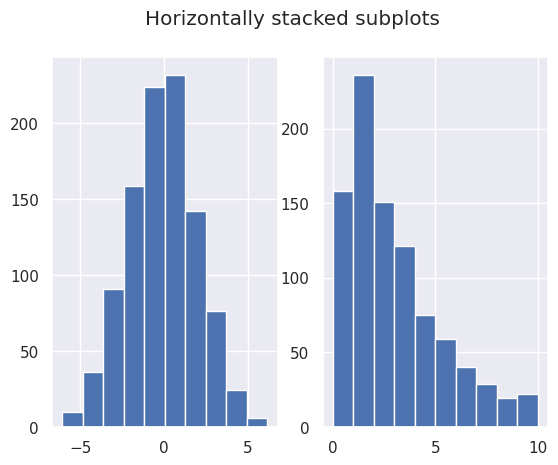

In [11]:
ntries = 1000
gaussarray = np.array([])
lognormarray = np.array([])
for _ in range(ntries):
	value = np.random.lognormal(1, 1)
	lognormarray = np.append(lognormarray,value)

for _ in range(ntries):
	value = gauss(0, 2)
	gaussarray = np.append(gaussarray,value)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gauss and Lognormal')
ax1.hist(gaussarray)
ax2.hist(lognormarray, range=[0,10])

print("Gaussian")
print("first central moment", moment(gaussarray, moment=1))
print("second central moment", moment(gaussarray, moment=2))
print("third central moment", moment(gaussarray, moment=3))
print("fourth central moment", moment(gaussarray, moment=4))

print("Log-normal")
print("first central moment", moment(lognormarray, moment=1))
print("second central moment", moment(lognormarray, moment=2))
print("third central moment", moment(lognormarray, moment=3))
print("fourth central moment", moment(lognormarray, moment=4))

Now that we think we understand what the code is doing, we can look at the moments of the "blobs" dataset....

the first central moment ought to be 0: [0. 0. 0.]
the second central moment ought to match with the variances we calculated with np.var() [12.68495103  6.80791251 15.50392447]
skewness [ 19.73212088 -11.94266449  22.42243167]
kurtosis [276.47997201 149.33580755 401.25145124]


(array([ 90., 483., 391.,  84., 160., 197., 135., 240., 196.,  24.]),
 array([ 2.17644371,  3.67771493,  5.17898615,  6.68025738,  8.1815286 ,
         9.68279982, 11.18407104, 12.68534226, 14.18661348, 15.6878847 ,
        17.18915593]),
 <BarContainer object of 10 artists>)

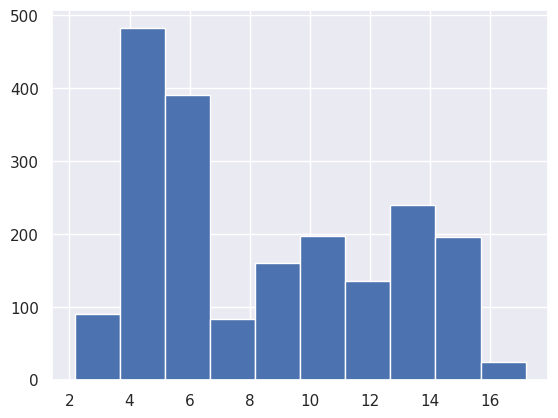

In [16]:
#always check the documentation to make sure the definitions are the same

print("the first central moment ought to be 0:", moment(blobs, moment=1))
print("the second central moment ought to match with the variances we calculated with np.var()", moment(blobs, moment=2))
print("third central moment", moment(blobs, moment=3))
print("fourth central moment", moment(blobs, moment=4))

plt.hist(blobs['x2'])


For the blobs dataset, the results might not be particularly illuminating, but the higher order moments can be particularly useful when you are trying to compare datasets for which you don't have a model (e.g. you don't know the dataset should be Gaussian or Poisson or ...) or you would just like to make a statement independent of models.  Here is an example from my past: https://arxiv.org/pdf/nucl-ex/0611019.pdf  In this case we measured a bunch of particle distributions and we wanted to compare their model independent way.

More recently, here is a paper by our own Prof. Noronha-Hostler and collaborators proposing looking at the skewness of a distribution as a physics observable: https://inspirehep.net/literature/1791971.  This inspired the measurement of these moments by the ALICE Collaboration at the Large Hadron Collider here (https://arxiv.org/pdf/2308.16217.pdf).

**Mixed Moments**

In addition to the moments of a single variable, for multivariate distributions, mixed-moments can be defined.  Taking the equation above:

$$ \Large
\langle g\rangle \equiv \iint dx dy\, g(x,y) P(x,y) \; .
$$

if $g(x,y) = x^ny^m$ then $\langle g\rangle$ would be the raw moment of
order $n$ of x and $m$ of y.  Central and standard mixed moments can be defined analogously to those for one variable above; for example the central moment of order $n$ of x and $m$ of y would be $g(x,y) = (x-\bar{x})^n(y-\bar{y})^m$ This can be generalized to an aritbrary number
of variables.  

This can seem esoteric, but for two variables and $m=n=1$, we
will define the correlation and covariance below that is a key concept for
interpreting data.  Additionally, my group has a recent paper about using
moments to try to determine the fluctuations in jet measurements in heavy-ion
collisions by measuring moments of the angular particle distributions (https://inspirehep.net/literature/2683577).



### <span style="color:LightGreen">Covariance</span>

If you have more than one variable, a key question is whether having more than one variable providing new information or are the variables just repeating the same information?  Here will will introduce **correlation** and **covariance**.

The **correlation between x and y** is defined as:
$$ \Large
\text{Corr}_{xy} \equiv \langle\left( x - \overline{x}\right) \left( y - \overline{y}\right)\rangle \; .
$$

A useful combination of the correlation and variances is the **correlation coefficient**,

$$ \Large
\rho_{xy} \equiv \frac{\text{Corr}_{x,y}}{\sigma_x \sigma_y} \; ,
$$

which, by construction, must be in the range $[-1, +1]$. Larger values of $|\rho_{xy}|$ indicate that $x$ and $y$ are measuring related properties of the outcome so, together, carry less information than when $\rho_{xy} \simeq 0$. In the limit of $|\rho_{xy}| = 1$, $y = y(x)$ is entirely determined by $x$, so carries no new information.

We say that the variance and correlation are both *second-order moments* since they are expectation values of second-degree polynomials.

We call the random variables $x$ and $y$ **uncorrelated** when:

$$ \Large
x,y\, \text{uncorrelated}\quad\Rightarrow\quad \text{Corr}_{xy} = \rho_{xy} = 0 \; .
$$

To obtain an **empirical estimate** of the quantities above derived from your data, use the corresponding numpy functions, as we'll see below.

array([[ 1.        , -0.72872772],
       [-0.72872772,  1.        ]])

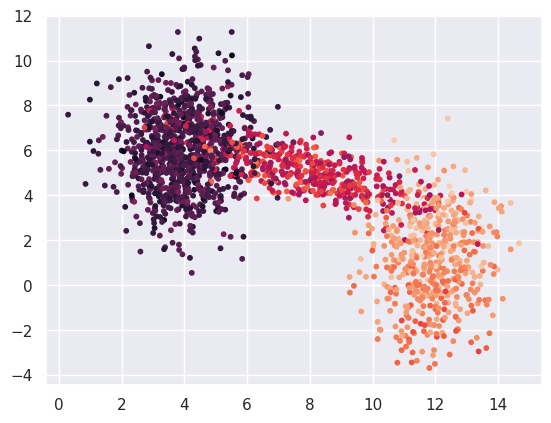

In [52]:
plt.scatter(blobs['x0'], blobs['x1'], c=blobs['x2'], s=10)
np.corrcoef(blobs['x0'], blobs['x1'])

It is useful to construct the **covariance matrix** $C$ with elements:

$$ \Large
C \equiv \begin{bmatrix}
\sigma_x^2 & \rho_{x,y} \sigma_x \sigma_y \\
\rho_{x,y} \sigma_x \sigma_y & \sigma_y^2 \\
\end{bmatrix}
$$

With more than 2 random variables, $x_0, x_1, \ldots$, this matrix generalizes to:

$$ \Large
C_{ij} = \langle \left( x_i - \overline{x}_i\right) \left( x_j - \overline{x}_j\right)\rangle \; .
$$

Comparing with the definitions above, we find variances on the diagonal:

$$ \Large
C_{ii} = \sigma_i^2
$$

and symmetric correlations on the off-diagonals:

$$ \Large
C_{ij} = C_{ji} = \rho_{ij} \sigma_i \sigma_j \; .
$$

(The covariance is not only symmetric but also [positive definite](https://en.wikipedia.org/wiki/Positive-definite_matrix)).

The covariance matrix is similar to a pairplot, with each $2\times 2$ submatrix

$$ \Large
\begin{bmatrix}
\sigma_i^2 & \rho_{ij} \sigma_i \sigma_j \\
\rho_{ij} \sigma_i \sigma_j & \sigma_j^2 \\
\end{bmatrix}
$$

describing a 2D elllipse in the $(x_i, x_j)$ plane:

<img src="https://courses.physics.illinois.edu/phys398dap/fa2023/img/Statistics-Ellipse.png" width=800 align=left></img><br>

Note that you can directly read off the correlation coefficient $\rho_{ij}$ from any of the points where the ellipse touches its bounding box. The ellipse rotation angle $\theta$ is given by:

$$ \Large
\tan 2\theta = \frac{2 C_{ij}}{C_{ii} - C_{jj}} = \frac{2\rho_{ij}\sigma_i\sigma_j}{\sigma_i^2 - \sigma_j^2}
$$

and its [principal axes](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) have lengths:

$$ \Large
a_\pm = 2\sqrt{C_{ii} + C_{jj} \pm d} \quad \text{with} \quad
d = \sqrt{C_{11}^2 - 2 (1 - 2\rho^2) C_{11} C_{22} + C_{22}^2} \; .
$$

For practical calculations, the Singular Value Decomposition (SVD) of the covariance is useful:

```
U, s, _ = np.linalg.svd(C)
theta = np.arctan2(U[1, 0], U[0, 0])
ap, am = 2 * np.sqrt(s)
```

The above assumes $C$ is $2\times 2$. In the general $D\times D$ case, use `C[[[j], [i]], [[j, i]]]` to pick out the $(i,j)$ $2\times 2$ submatrix.

Going back to the multivariate Gaussian of Week 2...

(1000, 2)
[[-0.72779275  0.67236446]
 [-0.96805856  2.27283464]
 [-0.12871372 -0.1059916 ]
 [ 0.2528779   1.10152069]
 [ 0.8840909   2.2946894 ]]


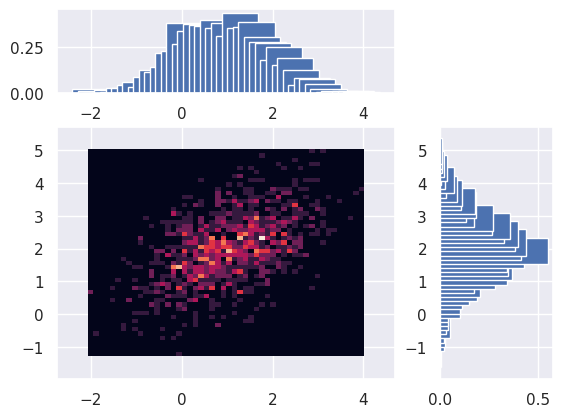

array([[0.94242736, 0.47159033],
       [0.47159033, 0.96552277]])

In [9]:
from scipy.integrate import simpson
from matplotlib.gridspec import GridSpec



np.random.seed(0)
cov1 = 0.5
mean, cov = [1, 2], [[1, cov1], [cov1, 1]] #means and covariance matrix
z = np.random.multivariate_normal(mean, cov, 1000)
print(z.shape)
print(z[:5, :])

fz, ex, ey = np.histogram2d(*z.T, bins=50, density=True)
x = (ex[:-1] + ex[1:]) / 2
y = (ey[:-1] + ey[1:]) / 2

fx = simpson(fz, y, axis=1)
fy = simpson(fz, x, axis=0)

gs = GridSpec(2, 2, width_ratios=[3,1], height_ratios=[1,3])
ax_fz = plt.subplot(gs[1,0])
ax_fx = plt.subplot(gs[0,0], sharex=ax_fz)
ax_fy = plt.subplot(gs[1,1], sharey=ax_fz)

ax_fz.pcolormesh(x, y, fz.T)
ax_fx.bar(x, fx)
ax_fy.barh(y, fy)


plt.show()

np.corrcoef(z[:,0],z[:,1]) #this gets the correlation coefficient
np.cov(z[:,0],z[:,1]) # just a nice sanity check :)


**EXERCISE:** Calculate the empirical covariance matrix of the `blobs` dataset using `np.cov` (pay attention to the `rowvar` arg!). Next, calculate the ellipse rotation angles $\theta$ in degrees for each of this matrix's 2D projections.

In [10]:
C = np.cov(blobs, rowvar=False)
print(C)
for i in range(3):
    for j in range(i + 1, 3):
        U, s, _ = np.linalg.svd(C[[[j], [i]], [[j, i]]])
        theta = np.arctan2(U[1, 0], U[0, 0])
        print(i, j, np.round(np.degrees(theta), 1))

[[12.69129667 -6.77538336 12.4214917 ]
 [-6.77538336  6.81131817 -6.94646999]
 [12.4214917  -6.94646999 15.51168031]]
0 1 123.3
0 2 -138.2
1 2 151.0


Recall that the `blobs` data was generated as a mixture of three Gaussian blobs, each with different parameters. However, describing a dataset with a single covariance matrix suggests a single Gaussian model. The lesson is that
we can calculate an empirical covariance for *any* data, whether or not it is well described a single Gaussian.